<a href="https://colab.research.google.com/github/Parveenkumar645/Sentiment-Analysis-of-Social-media-post/blob/main/Sentiment_Analysis_of_Social_media_post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Data management
import pandas as pd
import numpy as np
np.random.seed(0)
#from pandas_profiling import ProfileReport

#TextBlob Features
from textblob import TextBlob

#Plotting
import matplotlib.pyplot as plt

#SciKit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#nltk
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
#Tensorflow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Test
from collections import Counter

In [ ]:
#Training Data
path = "/content/twitter_training.csv"
train_df = pd.read_csv(path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

#Test Data (Not to be used until the full model has been trained)
test_path = "/content/twitter_validation.csv"
test_df = pd.read_csv(test_path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

In [ ]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [ ]:
train_df.shape

(73996, 4)

In [ ]:
df = train_df.sample(frac=0.1)
df.reset_index(drop=True, inplace=True)

In [ ]:
#See overall information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       7400 non-null   int64 
 1   Entity         7400 non-null   object
 2   Sentiment      7400 non-null   object
 3   Tweet_Content  7400 non-null   object
dtypes: int64(1), object(3)
memory usage: 231.4+ KB


In [ ]:
#Display a few entries
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2535,Borderlands,Negative,@ Borderlands. Can we get a big fix please? I'...
1,11073,TomClancysGhostRecon,Negative,@GhostRecon You call 1.1.0 an update. You're h...
2,3024,Dota2,Neutral,I'm excited to watch the EU's closed qualifyin...
3,6719,Fortnite,Negative,"anyways but my fortnite here,, im annoyed."
4,1533,Battlefield,Negative,Collateral with the revolver is so satisfying....


<BarContainer object of 4 artists>

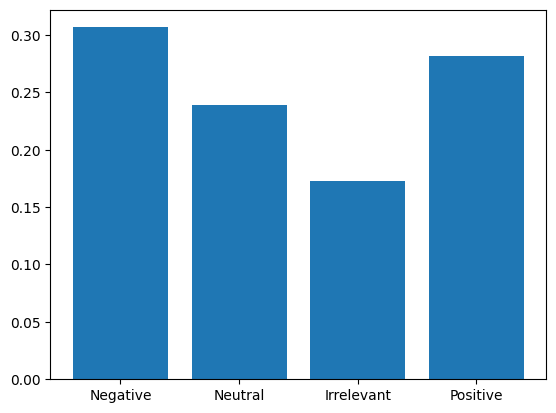

In [ ]:
#Display a few entries
#Checking balance of target classes
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) / len(df) for sentiment in sentiments]

plt.bar(sentiments, sentiment_nums)

In [ ]:
#Define the indexing for each possible label in a dictionary
class_to_index = {"Neutral":0, "Irrelevant":1, "Negative":2, "Positive": 3}

#Creates a reverse dictionary
index_to_class = dict((v,k) for k, v in class_to_index.items())

#Creates lambda functions, applying the appropriate dictionary
names_to_ids = lambda n: np.array([class_to_index.get(x) for x in n])
ids_to_names = lambda n: np.array([index_to_class.get(x) for x in n])

In [ ]:
#Test each function
print(names_to_ids(["Positive", "Negative", "Irrelevant", "Neutral"]))
print(ids_to_names([0,1,2,3]))

[3 2 1 0]
['Neutral' 'Irrelevant' 'Negative' 'Positive']


In [ ]:
#Convert the "Sentiment" column into indexes
df["Sentiment"] = names_to_ids(df["Sentiment"])

In [ ]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2535,Borderlands,2,@ Borderlands. Can we get a big fix please? I'...
1,11073,TomClancysGhostRecon,2,@GhostRecon You call 1.1.0 an update. You're h...
2,3024,Dota2,0,I'm excited to watch the EU's closed qualifyin...
3,6719,Fortnite,2,"anyways but my fortnite here,, im annoyed."
4,1533,Battlefield,2,Collateral with the revolver is so satisfying....


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')   # ⭐ THIS IS THE MISSING ONE
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter

lemmatiser = WordNetLemmatizer()
stop_english = Counter(stopwords.words('english'))

def remove_stopwords(ls):
    ls = [
        lemmatiser.lemmatize(word)
        for word in ls
        if word.isalpha() and word not in stop_english
    ]
    return " ".join(ls)

df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)
df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)


In [ ]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Tweet_Content_Split
0,2535,Borderlands,2,@ Borderlands. Can we get a big fix please? I'...,Borderlands Can get big fix please I reset ent...
1,11073,TomClancysGhostRecon,2,@GhostRecon You call 1.1.0 an update. You're h...,GhostRecon You call update You laugh ca stay c...
2,3024,Dota2,0,I'm excited to watch the EU's closed qualifyin...,I excited watch EU closed qualifying match EU ...
3,6719,Fortnite,2,"anyways but my fortnite here,, im annoyed.",anyways fortnite im annoyed
4,1533,Battlefield,2,Collateral with the revolver is so satisfying....,Collateral revolver unk


In [ ]:
#Define the Tokeniser
tokeniser = Tokenizer(num_words=10000, lower=True)

#Create the corpus by finding the most common
tokeniser.fit_on_texts(df["Tweet_Content_Split"])

In [ ]:
#Tokenise our column of edited Tweet content
tweet_tokens = tokeniser.texts_to_sequences(list(df["Tweet_Content_Split"]))

In [ ]:
#Pad these sequences to make them the same length
tweet_tokens = pad_sequences(tweet_tokens, truncating = 'post', padding='post', maxlen=50)

In [ ]:
tweet_tokens.shape

(7400, 50)

In [ ]:
#Remove dependent variable
y = df["Sentiment"]

#Drop all non-useful columns
df = pd.DataFrame(tweet_tokens)

In [ ]:
#Display final shape
df.shape

(7400, 50)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,16,input_length=50),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
h = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='accuracy',
            patience=5
        )
    ],
    verbose=1   # ⭐ THIS IS THE KEY
)


Epoch 1/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.3120 - loss: 1.3632 - val_accuracy: 0.4101 - val_loss: 1.2821
Epoch 2/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.5435 - loss: 1.0841 - val_accuracy: 0.5277 - val_loss: 1.1403
Epoch 3/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7351 - loss: 0.7416 - val_accuracy: 0.5291 - val_loss: 1.2017
Epoch 4/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8262 - loss: 0.5145 - val_accuracy: 0.5291 - val_loss: 1.3561
Epoch 5/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.8699 - loss: 0.3829 - val_accuracy: 0.5372 - val_loss: 1.4151
Epoch 6/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.8993 - loss: 0.3070 - val_accuracy: 0.5453 - val_loss: 1.5126
Epoch 7/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.9204 - loss: 0.2392 - val_accuracy: 0.5365 - val_loss: 1.6946
Epoch 8/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9307 - loss: 0.2094 - 

In [ ]:
#Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

#Assign labels to predictions and test data
y_pred_labels = ids_to_names(y_pred)
y_test_labels = ids_to_names(y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step


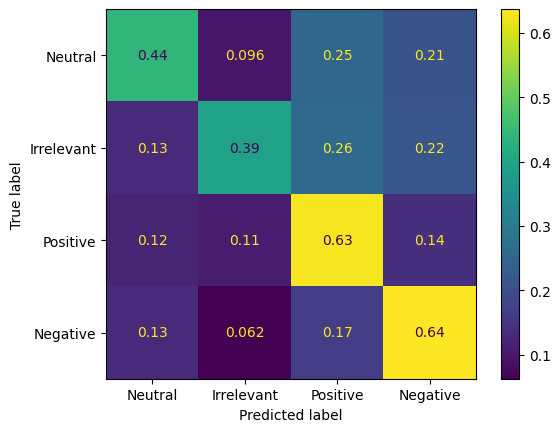

In [ ]:
y_unique = list(set(y_test_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()

In [ ]:
#Use the full dataset!
df = train_df

In [ ]:
#Convert the "Sentiment" column into indexes

##Train
df["Sentiment"] = names_to_ids(df["Sentiment"])
y = df["Sentiment"]

##Test
test_df["Sentiment"] = names_to_ids(test_df["Sentiment"])
y_test = test_df["Sentiment"]

In [ ]:
#Removing stopwords and lemmatising

##Train
#Splits each string into a list of words
df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

#Applies the above function to each entry in the DataFrame
lemmatiser = WordNetLemmatizer()
stop_english = Counter(stopwords.words()) #Here we use a Counter dictionary on the cached
                                          # list of stop words for a huge speed-up
df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

##Test
test_df["Tweet_Content_Split"] = test_df["Tweet_Content"].apply(word_tokenize)

test_df["Tweet_Content_Split"] = test_df["Tweet_Content_Split"].apply(remove_stopwords)

In [ ]:
#Tokenisation

#Define the Tokeniser
tokeniser = Tokenizer(num_words=10000, lower=True)

#Create the corpus by finding the most common
tokeniser.fit_on_texts(df["Tweet_Content_Split"])

##Train
#Tokenise our column of edited Tweet content
tweet_tokens = tokeniser.texts_to_sequences(list(df["Tweet_Content_Split"]))
tweet_tokens = pad_sequences(tweet_tokens, truncating = 'post', padding='post', maxlen=50)

##Test
#Tokenise our column of edited Tweet content
tweet_tokens_test = tokeniser.texts_to_matrix(list(test_df["Tweet_Content_Split"]))
tweet_tokens_test = pad_sequences(tweet_tokens_test, truncating = 'post', padding='post', maxlen=50)

In [ ]:
#Final prep

##Train
#Drop all non-useful columns
full_df = pd.DataFrame(tweet_tokens)

##Test
full_test_df = pd.DataFrame(tweet_tokens_test)

In [ ]:
#Original
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,16,input_length=50),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
h = model.fit(
     full_df, y,
     validation_data=(full_test_df, y_test),
     epochs=30,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)]
)

Epoch 1/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 176s 71ms/step - accuracy: 0.5129 - loss: 1.1180 - val_accuracy: 0.2570 - val_loss: 1.3836
Epoch 2/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 161s 70ms/step - accuracy: 0.7737 - loss: 0.6093 - val_accuracy: 0.2820 - val_loss: 1.4021
Epoch 3/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 201s 69ms/step - accuracy: 0.8352 - loss: 0.4438 - val_accuracy: 0.3000 - val_loss: 1.3637
Epoch 4/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 162s 70ms/step - accuracy: 0.8677 - loss: 0.3573 - val_accuracy: 0.3120 - val_loss: 1.3978
Epoch 5/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 200s 69ms/step - accuracy: 0.8875 - loss: 0.3029 - val_accuracy: 0.3110 - val_loss: 1.3891
Epoch 6/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 201s 69ms/step - accuracy: 0.8994 - loss: 0.2687 - val_accuracy: 0.2840 - val_loss: 1.3835
Epoch 7/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 161s 70ms/step - accuracy: 0.9071 - loss: 0.2405 - val_accuracy: 0.2880 - val_loss: 1.4207
Epoch 8/30
2313/2313 ━━━━━━━━━━━━━━━━━━━━ 160s 69ms/step - accuracy: 

In [ ]:
  #Generate predictions
y_pred = np.argmax(model.predict(full_test_df), axis=1)

#Assign labels to predictions and test data
y_pred_labels = ids_to_names(y_pred)
y_test_labels = ids_to_names(y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step


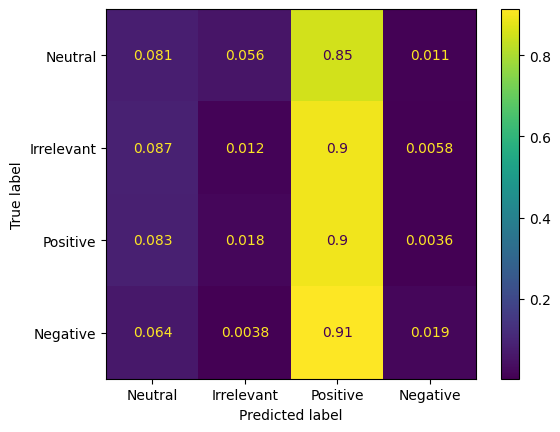

In [ ]:
y_unique = list(set(y_test_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()

In [ ]:
#To see the final accuracy
accuracy_score(y_test, y_pred)

0.278